<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [19]:
# Import necessary libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Setup device-agnostic code


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [21]:
# Create the data parameters
X = torch.arange(1, 1000, 0.01)

# Make X and y using linear regression feature
y = 0.3 * X + 0.9

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 99900
Number of y samples: 99900
First 10 X & y samples:
X: tensor([1.0000, 1.0100, 1.0200, 1.0300, 1.0400, 1.0500, 1.0600, 1.0700, 1.0800,
        1.0900])
y: tensor([1.2000, 1.2030, 1.2060, 1.2090, 1.2120, 1.2150, 1.2180, 1.2210, 1.2240,
        1.2270])


In [22]:
# Split the data into training and testing
train_size = int(0.8 * len(X))

trainX, trainY = X[:train_size], y[:train_size]
testX, testY = X[train_size:], y[train_size:]


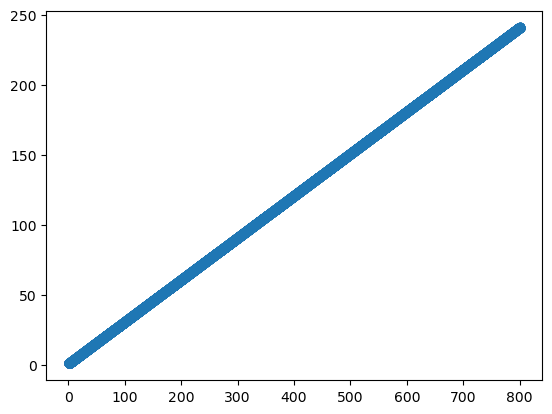

In [23]:
# Plot the training and testing data 

plt.scatter(trainX, y = trainY)

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [29]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegression(nn.Module):

    def __init__(self, ):
        super().__init__()
        self.weights = nn.Parameter(0.1 * torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(0.1 * torch.randn(1, requires_grad=True, dtype=torch.float32))
    
    def forward(self, x):
        return self.weights * x + self.bias

model1 = LinearRegression()

lossFn = nn.L1Loss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

for each_epoch in range(100):

    model1.train()
    y_pred = model1(trainX)
    loss = lossFn(y_pred, trainY)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model1.eval()
    with torch.inference_mode():
        test = model1(testX)
        test_loss = lossFn(test, testY)
    
    print(f" Epoch:{each_epoch} Train Loss is {loss} and test Loss is {test_loss}")



 Epoch:0 Train Loss is 139.523193359375 and test Loss is 303.1329650878906
 Epoch:1 Train Loss is 135.50723266601562 and test Loss is 294.12200927734375
 Epoch:2 Train Loss is 131.49127197265625 and test Loss is 285.1110534667969
 Epoch:3 Train Loss is 127.47532653808594 and test Loss is 276.1000671386719
 Epoch:4 Train Loss is 123.45938110351562 and test Loss is 267.0891418457031
 Epoch:5 Train Loss is 119.44342803955078 and test Loss is 258.0782165527344
 Epoch:6 Train Loss is 115.42747497558594 and test Loss is 249.0672607421875
 Epoch:7 Train Loss is 111.4115219116211 and test Loss is 240.0562744140625
 Epoch:8 Train Loss is 107.39556884765625 and test Loss is 231.04534912109375
 Epoch:9 Train Loss is 103.37963104248047 and test Loss is 222.03440856933594
 Epoch:10 Train Loss is 99.36367797851562 and test Loss is 213.02345275878906
 Epoch:11 Train Loss is 95.34772491455078 and test Loss is 204.0124969482422
 Epoch:12 Train Loss is 91.33177185058594 and test Loss is 195.001556396484

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model


In [ ]:
# Plot the predictions (these may need to be on a specific device)


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [33]:
from pathlib import Path

# 1. Create models directory 
modelPath = Path("test_model.pth")
torch.save(model1.state_dict(), f=modelPath)
# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
